## Central limit theorem

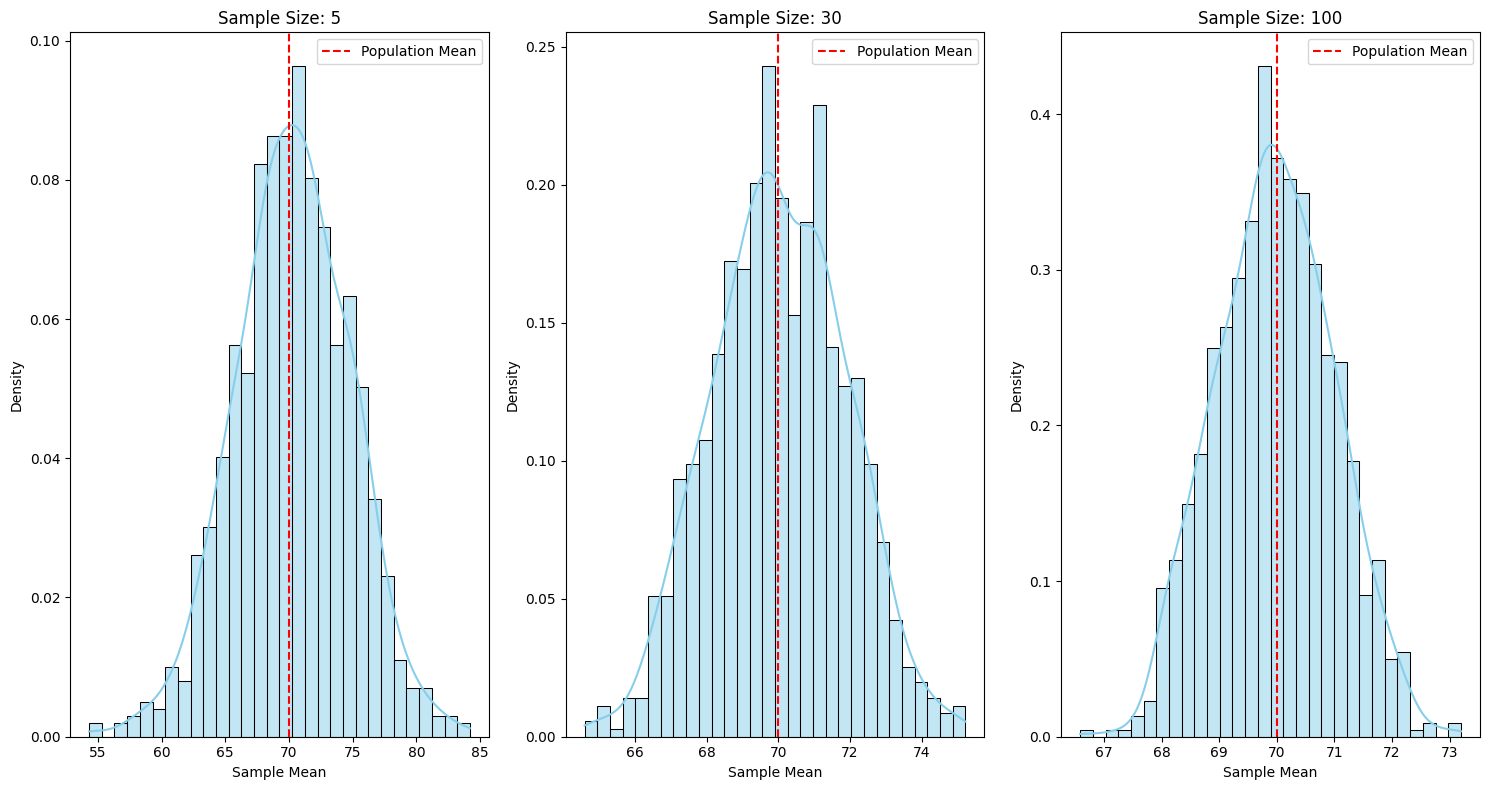

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom 
# Set the population parameters
population_mean = 70
population_std = 10
population_size = 100000

# Generate a population
population = np.random.normal(
    loc=population_mean, scale=population_std, size=population_size
)

# Parameters for the simulation
sample_sizes = [5, 30, 100]  # Different sample sizes
num_samples = 1000  # Number of samples to draw for each sample size

# Prepare the figure
plt.figure(figsize=(15, 8))

for i, n in enumerate(sample_sizes):
    sample_means = []

    # Draw samples and calculate sample means
    for _ in range(num_samples):
        sample = np.random.choice(population, size=n, replace=False)
        sample_means.append(np.mean(sample))

    # Plot the distribution of sample means
    plt.subplot(1, len(sample_sizes), i + 1)
    sns.histplot(sample_means, kde=True, bins=30, color="skyblue", stat="density")
    plt.title(f"Sample Size: {n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.axvline(x=population_mean, color="red", linestyle="--", label="Population Mean")
    plt.legend()

plt.tight_layout()
plt.show()

## Coin Flip simulator

In [2]:
import random
from math import sqrt


def mean(data):
    return float(sum(data)) / len(data)


def variance(data):
    mu = mean(data)
    return sum([(x - mu) ** 2 for x in data]) / len(data)


def stddev(data):
    return sqrt(variance(data))


def flip(N):
    """
    Simulates flipping N fair coins.

    Parameters:
        N (int): The number of coins to flip.

    Returns:
        list: A list of 0s and 1s, where each element represents the result of a coin flip.
    """
    return [1 if random.random() < 0.5 else 0 for _ in range(N)]


N = 1000
f = flip(N)

print(mean(f))
print(stddev(f))

0.53
0.49909918853871243


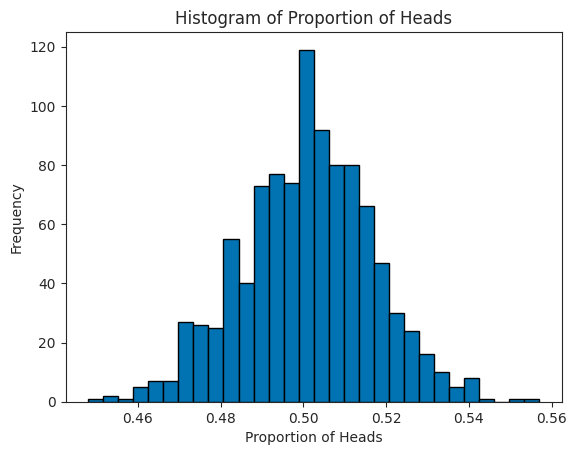

0.5009230000000001
0.015816291316234684


In [3]:
# Write a function sample that simulates N sets of coin flips and
# returns a list of the proportion of heads in each set of N flips
# It may help to use the flip and mean functions that you wrote before

import random
from math import sqrt
from plotting import *


def mean(data):
    return float(sum(data)) / len(data)


def variance(data):
    mu = mean(data)
    return sum([(x - mu) ** 2 for x in data]) / len(data)


def stddev(data):
    return sqrt(variance(data))


def flip(N):
    return [random.random() > 0.5 for x in range(N)]


def sample(N):
    return [mean(flip(N)) for _ in range(N)]


N = 1000
outcomes = sample(N)
plt.hist(outcomes, bins=30, edgecolor="black")
plt.xlabel("Proportion of Heads")
plt.ylabel("Frequency")
plt.title("Histogram of Proportion of Heads")
plt.show()


print(mean(outcomes))
print(stddev(outcomes))

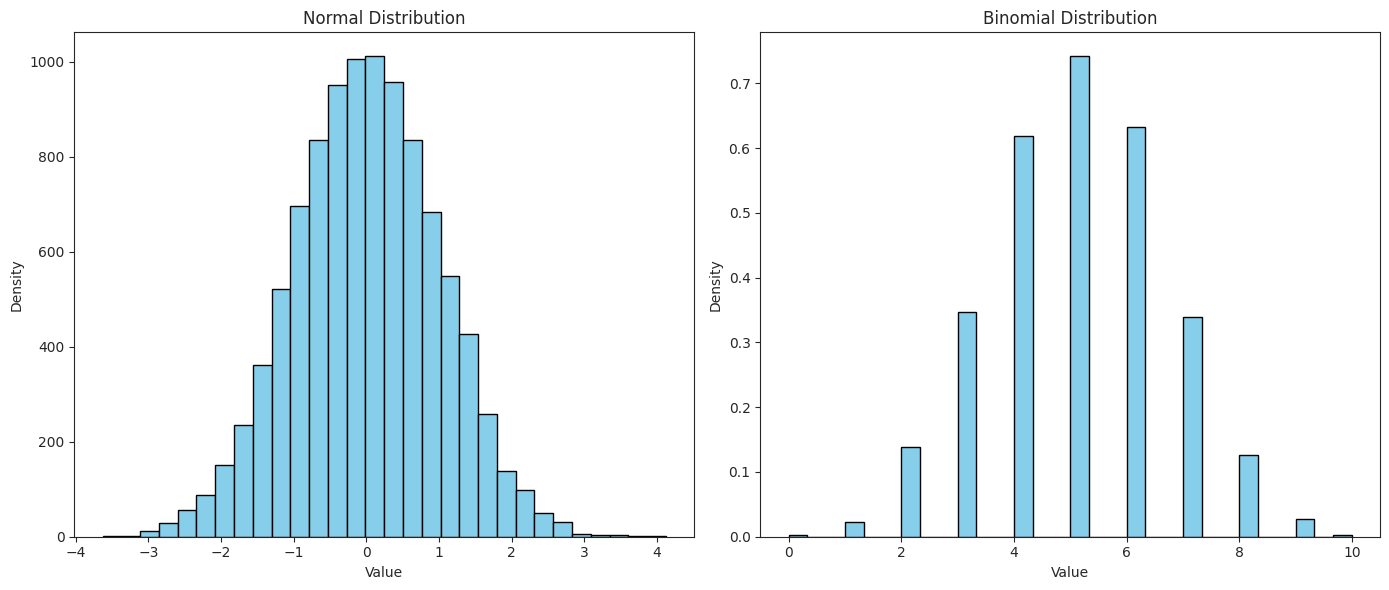

In [4]:
# Drawing samples from distributions and plotting histograms 

# Continous distribution: Normal (Gaussian)
# Parameters : mean (loc) = 0, standard deviation (scale) = 1 


import matplotlib.pyplot as plt
mean, std_dev = 0, 1
normal_samp = norm.rvs(loc=mean, scale=std_dev, size=10000)

# Discrete ditribution: Binomial
# Parameters: n = number of trials, p = probability of success

n, p = 10, 0.5
binom_samp = binom.rvs(n=n, p=p, size = 10000)

# Plot histogran of both distributions
plt.figure(figsize=(14, 6))

# Plot the histogram for the normal distribution
plt.subplot(1, 2, 1)
plt.hist(normal_samp, bins=30, color='skyblue', edgecolor='black')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Plot the histogram for the binomial distribution
plt.subplot(1, 2, 2)
plt.hist(binom_samp, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

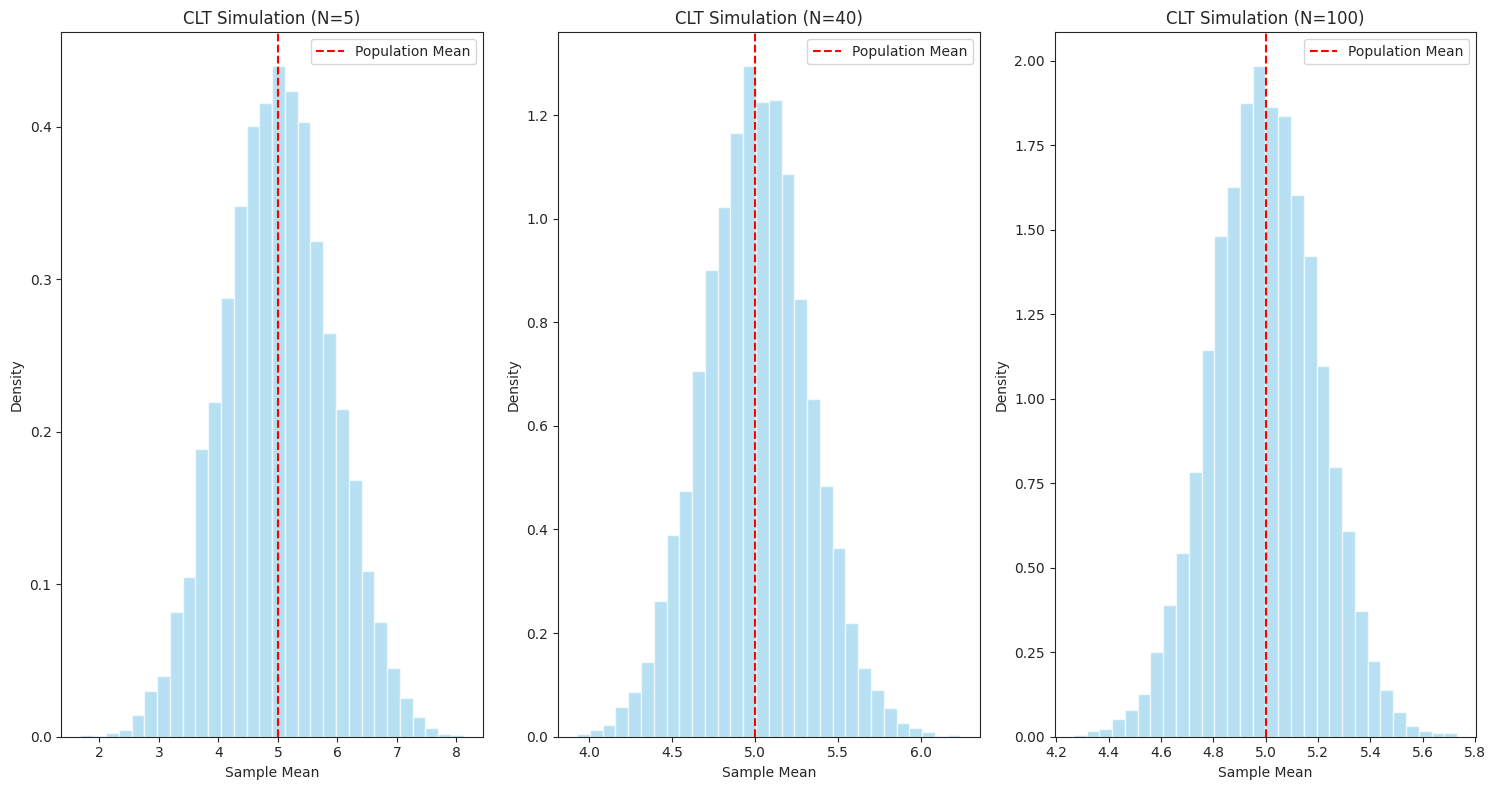

In [5]:
# Central Limit Theorem Simulation


import matplotlib.pyplot as plt
def sim_clt(distribution, params, N, repetitions=10000):
    """
    Simulate the Central Limit Theorem for a given distribution.

    Parameters:
    - distribution: The distribution function (e.g., np.random.normal)
    - params: A dictionary of parameters for the distribution
    - N: The sample size
    - repetitions: The number of samples to draw

    Returns:
    - A list of sample means
    """
    sample_means = [] # List to store sample means

    for _ in range(repetitions):
        # Drawing N samples from distribution 
        sample = distribution(size=N, **params)
        # Calculate mean and save it to the list
        sample_means.append(np.mean(sample))

    return sample_means

# Parameter for the normal distribution for CLT simulation
mean, std_dev = 5, 2 # Changing parameters for experimentation
N_values = [5, 40, 100] # Different sample sizes

plt.figure(figsize=(15, 8))

# Running the simulation for each value of N
for i, N in enumerate(N_values, 1):
    sample_means = sim_clt(np.random.normal, {'loc': mean, 'scale': std_dev}, N)
    # Plotting the distribution of sample means
    plt.subplot(1, len(N_values), i)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')
    plt.title(f'CLT Simulation (N={N})')
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.axvline(x=mean, color='red', linestyle='--', label='Population Mean')
    plt.legend()

plt.tight_layout()
plt.show()

